This notebook analyzes a short dt run. This means the transitioner thinks the "dt" is 12 seconds, but the true dt is 120 seconds, so transitions are forced to happen less frequently. We see that the stochastic run produces significantly different results than the base model run, contrary to when the transitioner dt is 120 seconds. It retains more zonal variance and the PW decreases less over the first seven days than the base model.

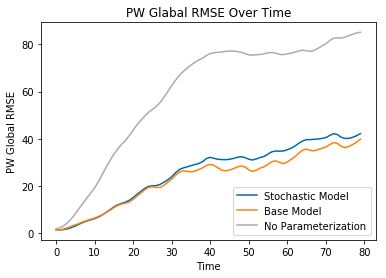

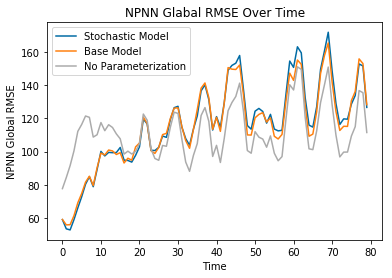

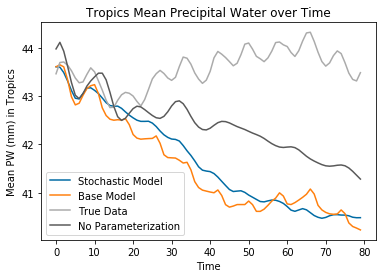

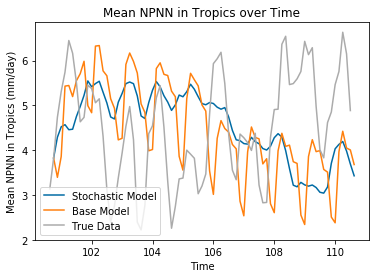

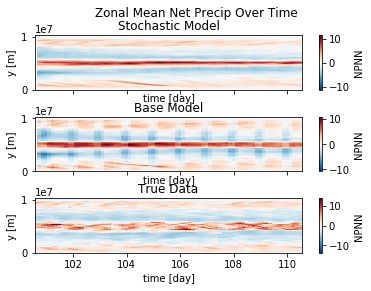

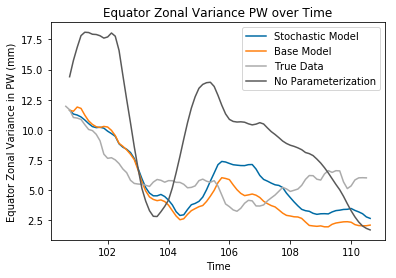

In [1]:
from uwnet.stochastic_parameterization.compare_stochastic_model_to_base_model import (
    plot_rmse_over_time,
    plot_total_pw_over_time,
    plot_npnn_over_time,
    plot_zonal_mean_npnn_over_time,
    plot_pw_tropics_zonal_variance_over_time,
)
from uwnet.stochastic_parameterization.utils import get_dataset
from uwnet.thermo import lhf_to_evap
import xarray as xr

%matplotlib inline
dir_ = '/Users/stewart/Desktop/'
ds_no_param = xr.open_dataset(dir_ + 'no_parameterization.nc')
ds_s = xr.open_dataset(dir_ + 'stochastic_model_gcm_output_short_dt.nc')
ds_b = xr.open_dataset(dir_ + 'base_model_gcm_output.nc')
ds_true = get_dataset(
    ds_location="/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/training.nc",  # noqa
    set_eta=False,
    t_start=0,
    t_stop=len(ds_s.time))
ds_true['NPNN'] = ds_true.Prec - lhf_to_evap(ds_true.LHF)
plot_rmse_over_time(ds_s, ds_b, ds_true, ds_no_param, 'PW')
plot_rmse_over_time(ds_s, ds_b, ds_true, ds_no_param, 'NPNN')
plot_total_pw_over_time(ds_s, ds_b, ds_true, ds_no_param)
plot_npnn_over_time(ds_s, ds_b, ds_true)
plot_zonal_mean_npnn_over_time(ds_s, ds_b, ds_true)
plot_pw_tropics_zonal_variance_over_time(ds_s, ds_b, ds_true, ds_no_param)